# Section 8: Automatic Differentiation
- chain rule
- backpropagation, forward accumulation

## 74: Autodiff with Pytorch

In [1]:
import numpy as np
import torch

In [2]:
# x = torch.tensor(5.0)
# x.requires_grad_()
x = torch.tensor(5.0, requires_grad=True)

In [3]:
y = x**2
y.backward() # Calculate gradient automatically

In [4]:
x.grad

tensor(10.)

## 76. The Line Equation as a Tensor Graph
Regression in Pytorch

In [5]:
import torch
import matplotlib.pyplot as plt

In [6]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.]) # E.g.: Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [7]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) # E.g.: Patient's "forgetfulness score"
y
# Or random from normal distribution
# y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

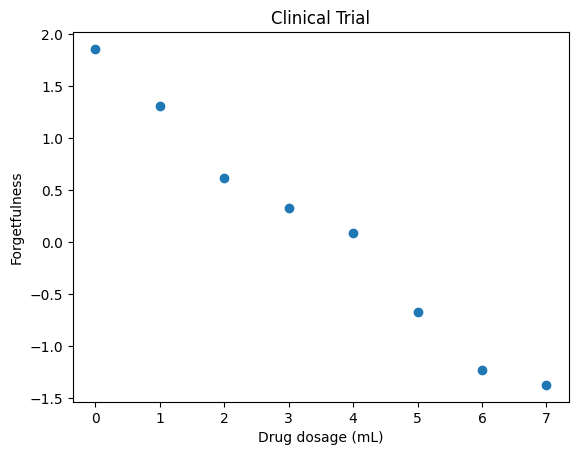

In [8]:
# Visualize
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
ax.scatter(x,y)

Initialize m & b randomly

In [9]:
m = torch.tensor([0.9],requires_grad=True)
b = torch.tensor([0.1],requires_grad=True)
print(m)
print(b)

tensor([0.9000], requires_grad=True)
tensor([0.1000], requires_grad=True)


In [10]:
# Regression line
def regression(x, m, b):
    return m * x + b

In [11]:
# Plot regression line
def regression_plot(x, y, m, b):
    fig, ax = plt.subplots()
    ax.scatter(x,y)

    x_min, x_max = ax.get_xlim()
    print("x min: ", x_min)
    y_min = regression(x_min, m, b).detach().item()
    y_max = regression(x_max, m, b).detach().item()

    ax.set_xlim([x_min, x_max])
    ax.plot([x_min, x_max], [y_min, y_max])


x min:  -0.35000000000000003


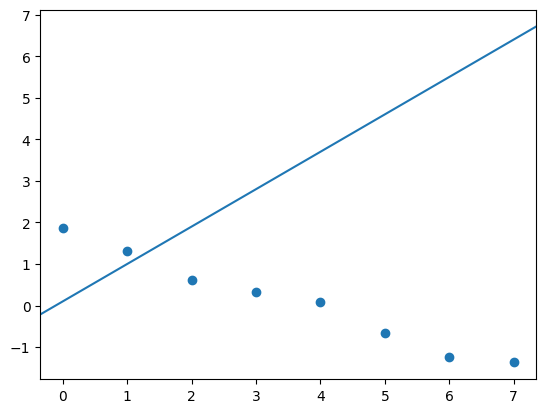

In [12]:
regression_plot(x,y,m,b)

#### Step 1: Forward pass

In [13]:
yhat = regression(x,m,b)

#### Step 2: Calculate Cost (Loss)

In [14]:
def mse(yhat, y):
    return torch.mean((y - yhat) ** 2)

In [15]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<MeanBackward0>)

#### Step 3: Use autodiff to calculate gradient of C w.r.t parameters
Calculate gradient descents with respect to parameters (m, b)

In [16]:
C.backward()

In [17]:
m.grad

tensor([36.3050])

In [18]:
b.grad

tensor([6.2650])

#### Step 4: Gradient descent
Update parameters (m & b)

In [19]:
optimizer = torch.optim.SGD([m,b], lr=0.01)
optimizer.step()

In [20]:
# Check if m and b are updated
print(m) 
print(b)

tensor([0.5369], requires_grad=True)
tensor([0.0374], requires_grad=True)


x min:  -0.35000000000000003


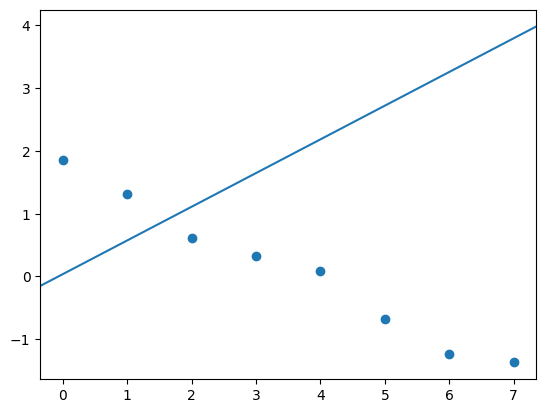

In [21]:
# Visualize
regression_plot(x,y,m,b)

#### Train
Repeat 4 steps to find the optimal parameters

In [22]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    yhat = regression(x,m,b) # step 1
    C = mse(yhat, y) # step 2
    C.backward() # step 3
    optimizer.step() # step 4
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 8.57, m grad 23.2, b grad 3.6
Epoch 1, cost 4.08, m grad 14.8, b grad 1.91
Epoch 2, cost 2.25, m grad 9.49, b grad 0.831
Epoch 3, cost 1.51, m grad 6.11, b grad 0.15
Epoch 4, cost 1.2, m grad 3.96, b grad -0.28
Epoch 5, cost 1.07, m grad 2.59, b grad -0.552
Epoch 6, cost 1.01, m grad 1.72, b grad -0.723
Epoch 7, cost 0.981, m grad 1.17, b grad -0.829
Epoch 8, cost 0.962, m grad 0.82, b grad -0.894
Epoch 9, cost 0.948, m grad 0.595, b grad -0.934
Epoch 10, cost 0.936, m grad 0.452, b grad -0.957
Epoch 11, cost 0.925, m grad 0.361, b grad -0.969
Epoch 12, cost 0.915, m grad 0.302, b grad -0.975
Epoch 13, cost 0.904, m grad 0.265, b grad -0.977
Epoch 14, cost 0.894, m grad 0.241, b grad -0.976
Epoch 15, cost 0.884, m grad 0.225, b grad -0.973
Epoch 16, cost 0.874, m grad 0.214, b grad -0.969
Epoch 17, cost 0.864, m grad 0.207, b grad -0.965
Epoch 18, cost 0.854, m grad 0.202, b grad -0.96
Epoch 19, cost 0.845, m grad 0.199, b grad -0.955
Epoch 20, cost 0.835, m grad 0.196, b

x min:  -0.35000000000000003


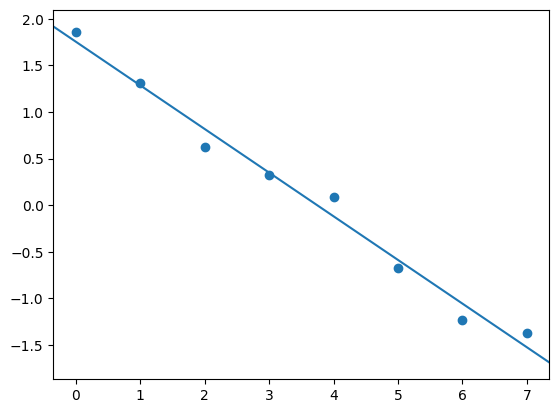

In [23]:
# Visualize the final line
regression_plot(x, y, m, b)

In [24]:
print(m.item())
print(b.item())

-0.4681258499622345
1.7542961835861206


### Review: using Algebra to solve
Moore Penrose Pseudoinverse 
$w = X^{+}y$

In [25]:
# Reshape from vector to a one-col matrix
x = x.view(-1,1)
x

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.]])

In [26]:
# Add bias column
X = torch.cat([x,torch.ones_like(x)], dim=1)

In [27]:
y = y.view(-1,1)
y

tensor([[ 1.8600],
        [ 1.3100],
        [ 0.6200],
        [ 0.3300],
        [ 0.0900],
        [-0.6700],
        [-1.2300],
        [-1.3700]])

In [28]:
# Compute the pseudoinverse and solve
X_pinv = torch.pinverse(X)
w = X_pinv @ y

In [29]:
y.shape

torch.Size([8, 1])

In [30]:
slope, bias = w[0].item(), w[1].item()
slope,bias

(-0.4692857563495636, 1.760000467300415)

### Excercises
1. Find the slope of $y = x^2 + 2x + 2$ where $x = 2$
2. Simulate a new relationship between y and x, and then fit the parameters w and b
3. Read about how differential programming, wherein computer programs can be differentiated.

#### Excercise 1

In [31]:
x = torch.tensor([2.0],requires_grad=True)

In [32]:
y = x**2 + 2*x + 2
y.backward()

In [33]:
x.grad.item()

6.0

#### Excercise 2
$ y = 3x + 5 $

In [37]:
# Simulate data
torch.manual_seed(0)
x = torch.linspace(0, 10, 100)
x = x.view(-1,1)
noise = torch.normal(mean=0.0, std=1.0, size=(100,1))
y = 3*x + 5 + noise

In [40]:
# Initialize parameters w and b
w = torch.randn(1, requires_grad=True)
b = torch.randn(1,requires_grad=True)

In [ ]:
# Training loop
lr = 0.01
epochs = 1000

for epoch in range(epochs):
    # optimizer.zero_grad() # Reset gradients to zero; else they accumulate

    # Forward
    yhat = w*x +b # y predict

    # Loss (Cost) 
    cost = mse(yhat, y)

    # Backward
    cost.backward()

    # Update parameters manually (SGD)
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        # Zero the gradients after udpate
        w.grad_zero()
        b.grad_zero()

    # optimizer.step()
    print('Epoch {}, cost {}, w grad {}, b grad {}'.format(epoch, '%.3g' % cost.item(), '%.3g' % w.grad.item(), '%.3g' % b.grad.item()))


Epoch 0, cost 559, w grad -272, b grad -43.2
Epoch 1, cost 559, w grad -544, b grad -86.4
Epoch 2, cost 559, w grad -815, b grad -130
Epoch 3, cost 559, w grad -1.09e+03, b grad -173
Epoch 4, cost 559, w grad -1.36e+03, b grad -216
Epoch 5, cost 559, w grad -1.63e+03, b grad -259
Epoch 6, cost 559, w grad -1.9e+03, b grad -302
Epoch 7, cost 559, w grad -2.17e+03, b grad -346
Epoch 8, cost 559, w grad -2.45e+03, b grad -389
Epoch 9, cost 559, w grad -2.72e+03, b grad -432
Epoch 10, cost 559, w grad -2.99e+03, b grad -475
Epoch 11, cost 559, w grad -3.26e+03, b grad -518
Epoch 12, cost 559, w grad -3.53e+03, b grad -561
Epoch 13, cost 559, w grad -3.81e+03, b grad -605
Epoch 14, cost 559, w grad -4.08e+03, b grad -648
Epoch 15, cost 559, w grad -4.35e+03, b grad -691
Epoch 16, cost 559, w grad -4.62e+03, b grad -734
Epoch 17, cost 559, w grad -4.89e+03, b grad -777
Epoch 18, cost 559, w grad -5.16e+03, b grad -821
Epoch 19, cost 559, w grad -5.44e+03, b grad -864
Epoch 20, cost 559, w gr

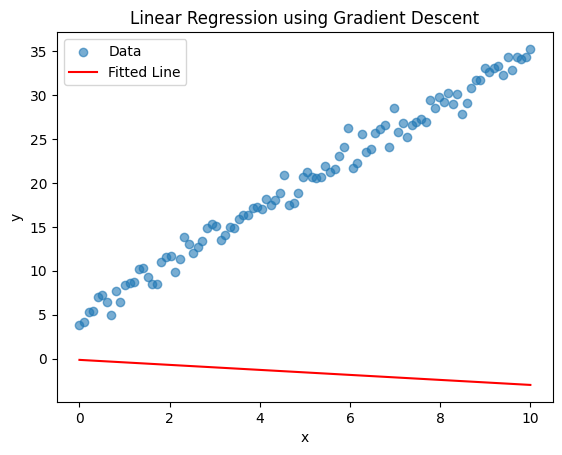

In [42]:
# Step 5: Plot results
with torch.no_grad():
    y_fit = w * x + b

plt.scatter(x.numpy(), y.numpy(), label="Data", alpha=0.6)
plt.plot(x.numpy(), y_fit.numpy(), color="red", label="Fitted Line")
plt.legend()
plt.title("Linear Regression using Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.show()